# EDA
Exploratory Data Analysis adalah proses yang memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. 

Dalam proses ini pemahaman konteks data juga diperhatikan karena akan menjawab masalah - masalah dasar.

## 1. Import Libraries

Import library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

## 2. Load Dataset

Load dataset hasil Crawling dengan menggunakan `tweepy` sebelumnya 

In [2]:
# Load Dataset
data1 = pd.read_csv('../data/Crawling Twitter Jakarta 26 - 27.csv')
data2 = pd.read_csv('../data/Crawling Twitter Jakarta 25 - 23.csv')
data3 = pd.read_csv('../data/Crawling Twitter Jakarta 22 - 19 setengah.csv')

**Dataset info**

Menampilkan banyak data dan `Dtype` tiap kolomnya.

In [3]:
# Info
for i in [data1,data2,data3]:
    i.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63468 entries, 0 to 63467
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tanggal         63468 non-null  object
 1   Tweets          63468 non-null  object
 2   ID              63468 non-null  int64 
 3   Screen Name     63468 non-null  object
 4   Banyak Retweet  63468 non-null  int64 
 5   Source          63468 non-null  object
 6   Retweet Status  63468 non-null  int64 
 7   Hashtags        63468 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.9+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95490 entries, 0 to 95489
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tanggal         95490 non-null  object
 1   Tweets          95490 non-null  object
 2   ID              95490 non-null  int64 
 3   Screen Name     95490 non-null  object
 4   Banyak Retweet  95490 no

## 3. Merge Dataset
Menyatukan dataset yang terpisah

In [4]:
# Merge Info
data = pd.concat([data1,data2,data3])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250279 entries, 0 to 91320
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Tanggal         250279 non-null  object
 1   Tweets          250279 non-null  object
 2   ID              250279 non-null  int64 
 3   Screen Name     250279 non-null  object
 4   Banyak Retweet  250279 non-null  int64 
 5   Source          250277 non-null  object
 6   Retweet Status  250279 non-null  int64 
 7   Hashtags        250279 non-null  object
dtypes: int64(3), object(5)
memory usage: 17.2+ MB


## 4. EDA

Melakukan `Exploratory Data Analysis` pada data.

## 4.1. Tweet perhari

Mengecek banyaknya tweet perharinya

In [5]:
# Melihat banyak Tweet perhari
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
tph = data['Tweets'].groupby(data['Tanggal'].dt.date).count()
frek = tph.values
h_index = {6:'Minggu',0:'Senin',1:'Selasa',2:'Rabu',3:'Kamis',4:'Jumat',5:"Sabtu"}
hari = [x.weekday() for x in tph.index]
hari = [h_index[x] for x in hari] 
for i in range(len(hari)):
    hari[i] = str(tph.index[i]) + f'\n{hari[i]}'

**Plotting** (Menampilkan hasil `EDA` lewat visual / Visualisasi Data)

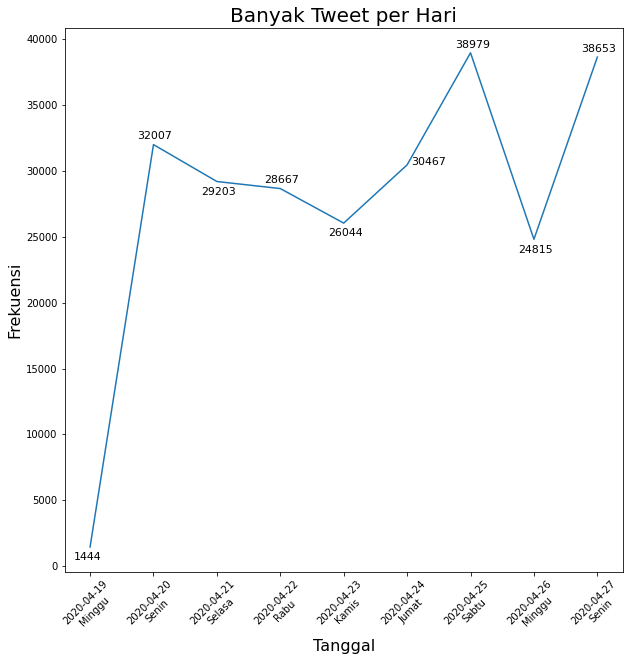

In [6]:
# Plotting Line
plt.figure(figsize = (10,10))
sns.lineplot(range(len(frek)), frek)
for i, v in enumerate(frek.tolist()):
    if i == 0 or i==2 or i ==4 or i == len(tph.values)-2:
        plt.text(i-.25, v - 1000, str(v),fontsize=11)
    elif i == 1 or i == 3 or i==6 or i == len(tph.values)-1:
        plt.text(i-.25, v + 400, str(v),fontsize=11)
    else :
        plt.text(i+.07, v, str(v),fontsize=11)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(range(len(tph.values)), hari, rotation=45)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()

**Insight**

Dapat dilihat jika jumlah tweet berada pada puncaknya di hari Sabtu dan Senin. Hal yang cukup mengejutkan yaitu terjadi penurunan jumlah tweet yang signifikan pada hari minggu.

## 4.2. Tweet perjam

Sekarang akan dilihat banyaknya tweet perjamnya.

In [7]:
# Melihat banyak Tweet perjam
tpj = []
for i in range(1,len(tph.index)) :
    if i != len(tph.index)-1 :
        tpj.append(data['Tanggal'][(data['Tanggal'] >= str(tph.index[i])) & (data['Tanggal']<str(tph.index[i+1]))])
    else :
        tpj.append(data['Tanggal'][data['Tanggal']>=str(tph.index[i])])
tpj = [x.groupby(x.dt.hour).count() for x in tpj]

**Plotting** (Menampilkan hasil `EDA` lewat visual / Visualisasi Data)

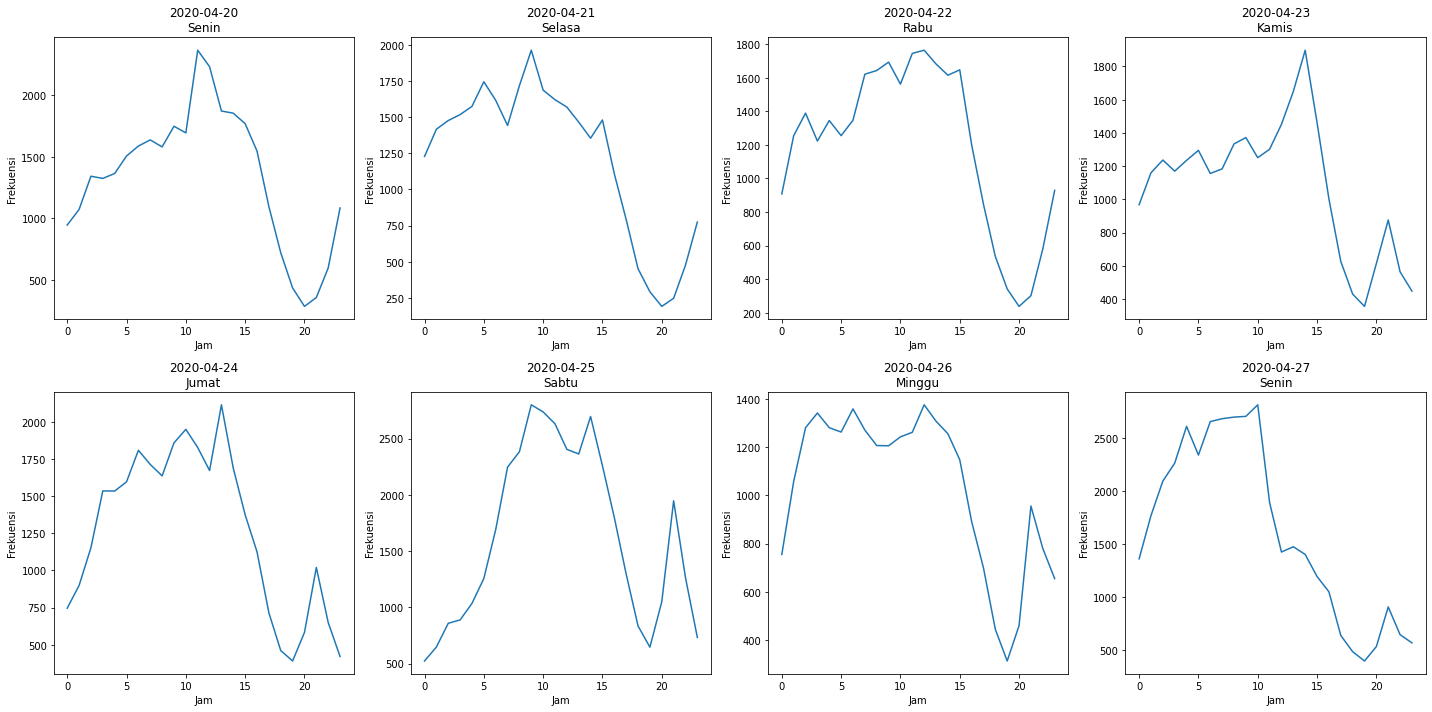

In [8]:
# Ploting Line
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i in range(len(tpj)):
    sns.lineplot(tpj[i].index.tolist(),tpj[i].values,ax=axes[i//4,i%4])
    axes[i//4,i%4].set_title(f'{hari[i+1]}')
    axes[i//4,i%4].set(xlabel = 'Jam', ylabel = 'Frekuensi')
    plt.tight_layout()
#fig.suptitle('Banyak Tweet per Jam',fontsize=24)
plt.show()

**Insight**

Dapat dilihat bahwa user optimal melakukan tweet pada pukul 10 - pukul 15, selanjutnya akan terjadi penurunan jumlah tweet pada pukul 15 sampai dengan pukul 20. Selanjutnya jumlah tweet kembali naik pada pukul 20 dan kemudian menurun pada pukul 21 / 22.

## 4.3. Perbandingan Tweet dan Retweet

Akan dilihat perbandingan antara jumlah tweet dan retweet yang ada.

In [9]:
# Menghitung perbandingan tweet dan retweet
r_stat = data['Retweet Status'].groupby(data['Retweet Status']).count()
temp = r_stat.values

**Plotting** (Menampilkan hasil `EDA` lewat visual / Visualisasi Data)

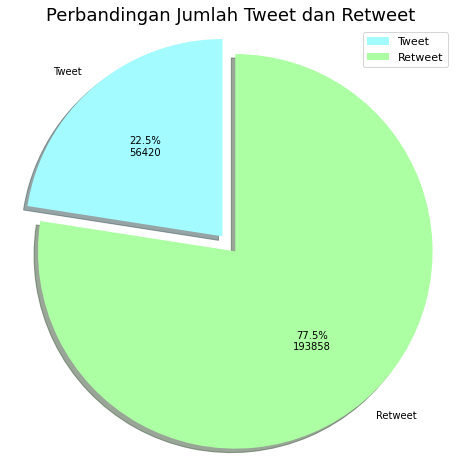

In [10]:
# Plotting Pie
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

plt.figure(figsize = (8,8))
plt.pie(temp,explode=(0.1,0),labels=['Tweet','Retweet'],shadow=True,colors=['#A3FBFF','#ADFFA3'],
        autopct=lambda pct: func(pct, temp),startangle=90)
plt.title('Perbandingan Jumlah Tweet dan Retweet',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

## 4.4. Hashtag terbanyak

Dilihat hashtag terbanyak.

In [11]:
# Menghitung banyak hashtag terkait
hashtag = data['Hashtags'].tolist()
temp = []
freks = []
for x in hashtag:
    if x != []:
        x = x.translate(str.maketrans('', '', string.punctuation))
        x = x.lower().split()
        for i in x :
            if i not in temp :
                temp.append(i)
                freks.append(1)
            else :
                freks[temp.index(i)] += 1
hashtag_ = pd.DataFrame({'Hashtag':temp,'Frekuensi':freks})
hashtag_ = hashtag_.sort_values(by='Frekuensi', ascending=False)

**Plotting** (Menampilkan hasil `EDA` lewat visual / Visualisasi Data)

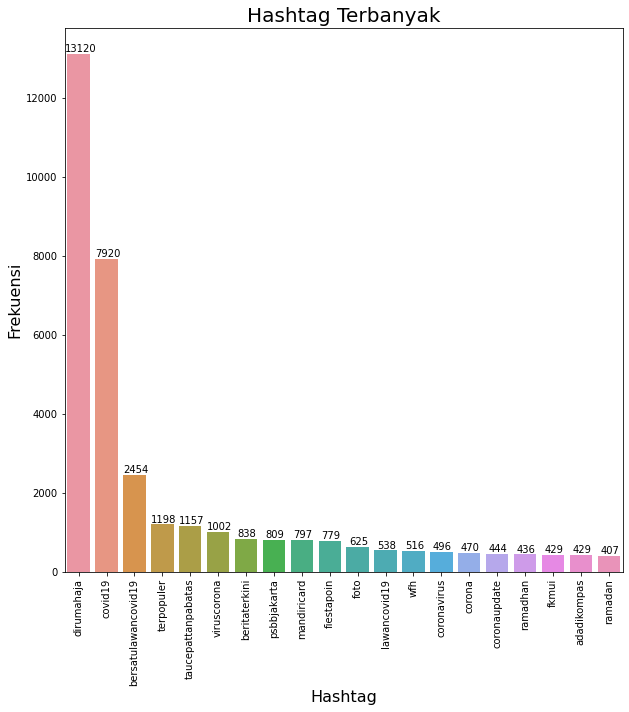

In [12]:
# Plot 20 hashtag terbanyak
hmm = hashtag_.head(20)
plt.figure(figsize = (10,10))
sns.barplot(x = hmm['Hashtag'],y = hmm['Frekuensi'])
for i, v in enumerate(hmm['Frekuensi'].tolist()):
    plt.text(i-len(str(v))/10, v + 50, str(v),fontsize=10)
plt.title('Hashtag Terbanyak',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Hashtag',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()

## 4.5. Source (Device) Terbanyak

Dilihat Source/Device terbanyak yang digunakan oleh user.

In [13]:
# Source count
source = data['Source'].groupby(data['Source']).count()
source = pd.DataFrame({'Source' : source.index.tolist(),'Frekuensi' : source.values})
source = source.sort_values(by='Frekuensi', ascending=False)

**Plotting** (Menampilkan hasil `EDA` lewat visual / Visualisasi Data)

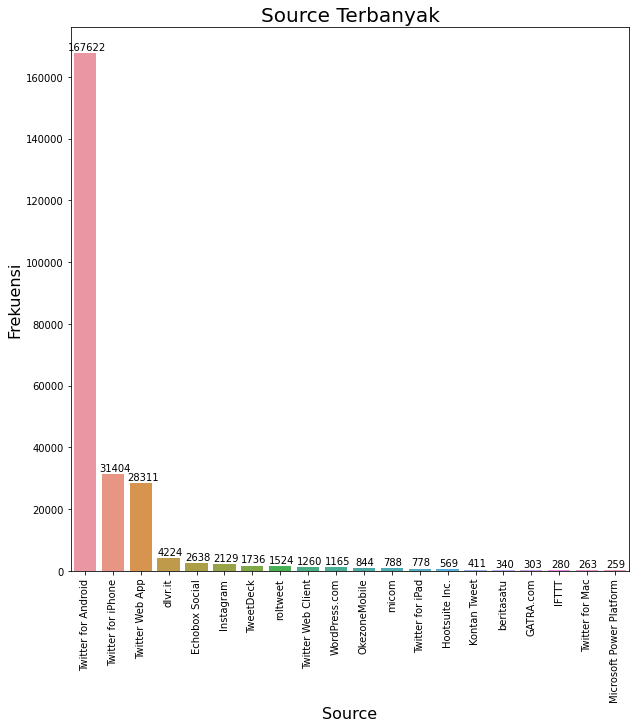

In [14]:
# Plot 20 Source terbanyak
hm = source.head(20)
plt.figure(figsize = (10,10))
sns.barplot(x = hm['Source'],y = hm['Frekuensi'])
for i, v in enumerate(hm['Frekuensi'].tolist()):
    plt.text(i-len(str(v))/10, v + 1000, str(v),fontsize=10)
plt.title('Source Terbanyak',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Source',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()